In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
red_wine_df = pd.read_csv('winequality_red.csv', sep=';')
white_wine_df = pd.read_csv('winequality_white.csv', sep=';')

red_wine_df['wine_type'] = 'red'
white_wine_df['wine_type'] = 'white'

In [30]:
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [31]:
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [32]:
df = pd.concat([red_wine_df, white_wine_df])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


## Preprocessing

In [33]:
df['quality_category'] = pd.cut(df['quality'],
                                bins=[0, 4, 6, 10],
                                labels=['Poor', 'Average', 'Good'],
                                include_lowest=True)

df['wine_type'] = df['wine_type'].apply(lambda x: 0 if x == 'red' else 1)

X = df.drop(['quality', 'quality_category'], axis=1)
y_strings = df['quality_category']

encoder = LabelEncoder()
y = encoder.fit_transform(y_strings)
print(f"Labels were encoded as: {list(encoder.classes_)} -> {list(range(len(encoder.classes_)))}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Labels were encoded as: ['Average', 'Good', 'Poor'] -> [0, 1, 2]


In [34]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,Average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,Average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,Average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,Average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,Average


## Correlation between the attributes
### Heatmap:

In [35]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(100, 100))

<Figure size 10000x10000 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

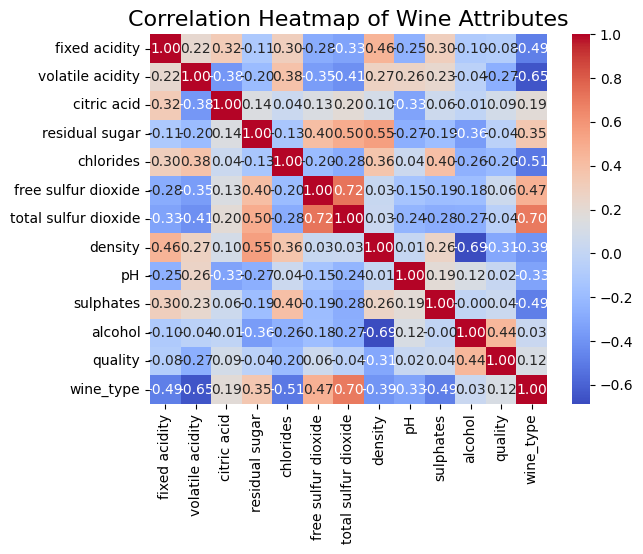

In [36]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Wine Attributes', fontsize=16)
plt.show()

### Analysis:
**Strongest Predictor of Quality**:

alcohol has the strongest positive correlation with both quality (0.44) and quality_category (0.36). This is the single most influential feature for predicting a wine's quality rating.

**Strong Negative Predictors**:

density has the strongest negative correlation with quality (-0.31). This is expected, as density and alcohol are strongly negatively correlated (-0.69); wines with more alcohol are less dense and rated higher. Volatile acidity also shows a notable negative correlation with quality (-0.27).

**High Multicollinearity**:

There is a very strong positive correlation between free sulfur dioxide and total sulfur dioxide (0.72). This indicates they carry redundant information.

- The high correlation (0.72) between free sulfur dioxide and total sulfur dioxide makes them redundant and one of them can be safely removed.
- The acidity-related features (fixed acidity, pH, citric acid) are all moderately inter-correlated. PCA can transform these acidity variables into one or two new features, often called "acidity components," that capture the most important information from the original features. This reduces the number of features while preserving the underlying information.

## Feature Selection from Heatmap Analysis
The correlation between free sulfur dioxide and total sulfur dioxide (0.72) is high. They provide very similar information to the model. Hence, one of them can be removed.

To find which among the two to remove, training two same models keeping only one of them and comparing the results:

In [37]:
X = df.drop(['quality', 'quality_category'], axis=1)
y_strings = df['quality_category']

encoder = LabelEncoder()
y = encoder.fit_transform(y_strings)

## Model A: Dropping free sulfur dioxide

In [38]:
X_A = X.drop('free sulfur dioxide', axis=1)

X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X_A, y, test_size=0.2, random_state=42, stratify=y)

scaler_A = StandardScaler()
X_train_A_scaled = scaler_A.fit_transform(X_train_A)
X_test_A_scaled = scaler_A.transform(X_test_A)

model_A = RandomForestClassifier(random_state=42)
model_A.fit(X_train_A_scaled, y_train_A)
y_pred_A = model_A.predict(X_test_A_scaled)

print("Results for Model A:")
print(classification_report(y_test_A, y_pred_A, target_names=encoder.classes_))

Results for Model A:
              precision    recall  f1-score   support

     Average       0.86      0.96      0.91       995
        Good       0.78      0.56      0.65       256
        Poor       0.83      0.10      0.18        49

    accuracy                           0.85      1300
   macro avg       0.82      0.54      0.58      1300
weighted avg       0.84      0.85      0.83      1300



## Model B: Dropping total sulfur dioxide

In [39]:
X_B = X.drop('total sulfur dioxide', axis=1)

X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, y, test_size=0.2, random_state=42, stratify=y)

scaler_B = StandardScaler()
X_train_B_scaled = scaler_B.fit_transform(X_train_B)
X_test_B_scaled = scaler_B.transform(X_test_B)

model_B = RandomForestClassifier(random_state=42)
model_B.fit(X_train_B_scaled, y_train_B)
y_pred_B = model_B.predict(X_test_B_scaled)

print("Results for Model B:")
print(classification_report(y_test_B, y_pred_B, target_names=encoder.classes_))

Results for Model B:
              precision    recall  f1-score   support

     Average       0.86      0.96      0.91       995
        Good       0.79      0.54      0.64       256
        Poor       0.86      0.12      0.21        49

    accuracy                           0.85      1300
   macro avg       0.84      0.54      0.59      1300
weighted avg       0.84      0.85      0.83      1300



## For feature selection
Since the accuracy obtained by dropping total sulfur dioxide is higher than the other, we keep only free sulfur dioxide for the futher processing.



In [40]:
X_train_fs = X_train.drop('free sulfur dioxide', axis=1)
X_test_fs = X_test.drop('free sulfur dioxide', axis=1)

scaler_fs = StandardScaler()
X_train_fs_scaled = scaler_fs.fit_transform(X_train_fs)
X_test_fs_scaled = scaler_fs.transform(X_test_fs)

# For Feature Extraction
The acidity-related features (fixed acidity, pH, citric acid) are all moderately inter-correlated. PCA can transform these acidity variables into new features that capture the most important information from the original features. This reduces the number of features while preserving the underlying information.


In [41]:
scaler_pca = StandardScaler()
X_train_scaled = scaler_pca.fit_transform(X_train)
X_test_scaled = scaler_pca.transform(X_test)

In [42]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Isolate the acidity features to apply PCA
acidity_features = ['fixed acidity', 'pH', 'citric acid']
X_train_acidity = X_train_scaled_df[acidity_features]
X_test_acidity = X_test_scaled_df[acidity_features]

In [43]:
pca = PCA(n_components=1)

# Fit PCA on the training data and transform both train and test data
X_train_pca = pca.fit_transform(X_train_acidity)
X_test_pca = pca.transform(X_test_acidity)

In [44]:
X_train_other_features = X_train_scaled_df.drop(acidity_features, axis=1)
X_test_other_features = X_test_scaled_df.drop(acidity_features, axis=1)

# Combine the new PCA components with the remaining features
X_train_fe = np.hstack((X_train_other_features, X_train_pca))
X_test_fe = np.hstack((X_test_other_features, X_test_pca))

In [45]:
model_fe = RandomForestClassifier(random_state=42)
model_fe.fit(X_train_fe, y_train)
y_pred_fe = model_fe.predict(X_test_fe)

print("Results for Model with Feature Extraction (PCA):")
print(classification_report(y_test, y_pred_fe, target_names=encoder.classes_))

Results for Model with Feature Extraction (PCA):
              precision    recall  f1-score   support

     Average       0.86      0.96      0.91       995
        Good       0.79      0.55      0.65       256
        Poor       0.75      0.12      0.21        49

    accuracy                           0.85      1300
   macro avg       0.80      0.54      0.59      1300
weighted avg       0.84      0.85      0.83      1300



# Model Training

## Logistic Regression


Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Parameters Found: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validated F1-score: 0.7373
Results for Logistic Regression:
              precision    recall  f1-score   support

     Average       0.80      0.95      0.87       995
        Good       0.54      0.25      0.34       256
        Poor       0.00      0.00      0.00        49

    accuracy                           0.77      1300
   macro avg       0.45      0.40      0.40      1300
weighted avg       0.72      0.77      0.73      1300

Confusion Matrix:
[[943  52   0]
 [193  63   0]
 [ 47   2   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


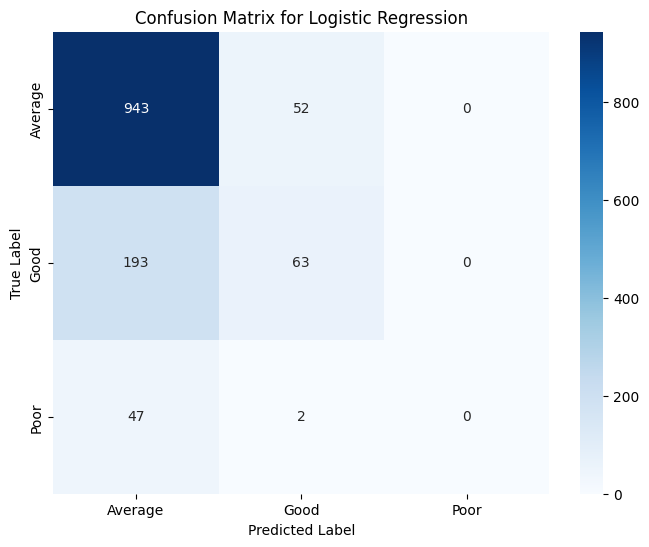

In [46]:
param_grid = {
    'C': [0.1, 1, 10, 50, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42),
                           param_grid=param_grid,
                           scoring='f1_weighted',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train_fe, y_train)

print("\nBest Parameters Found:", grid_search.best_params_)
print(f"Best cross-validated F1-score: {grid_search.best_score_:.4f}")

lr_model = grid_search.best_estimator_
y_pred_lr = lr_model.predict(X_test_fe)

print("Results for Logistic Regression:")
print(classification_report(y_test, y_pred_lr, target_names=encoder.classes_))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:43:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best Parameters Found: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Best cross-validated F1-score: 0.8115
Results for XGBoost Classifier:
              precision    recall  f1-score   support

     Average       0.86      0.94      0.90       995
        Good       0.73      0.57      0.64       256
        Poor       0.46      0.12      0.19        49

    accuracy                           0.84      1300
   macro avg       0.68      0.54      0.58      1300
weighted avg       0.82      0.84      0.82      1300

Confusion Matrix:
[[935  53   7]
 [111 145   0]
 [ 42   1   6]]


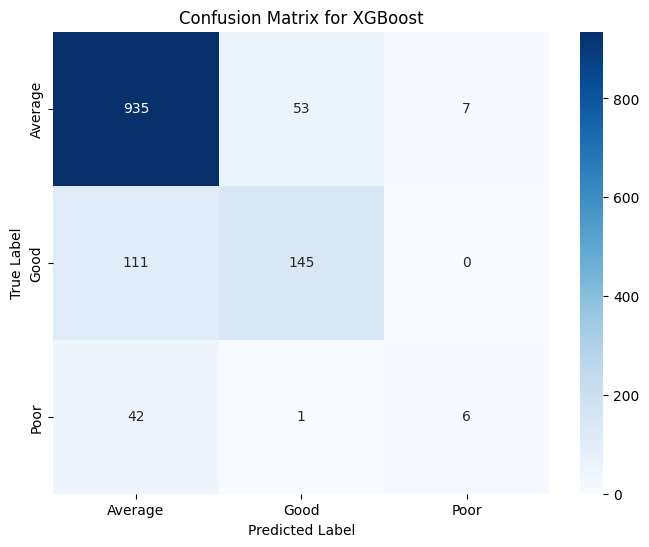

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
}

grid_search_xgb = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    param_grid=param_grid_xgb,
    scoring='f1_weighted',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search_xgb.fit(X_train_fe, y_train)

print("\nBest Parameters Found:", grid_search_xgb.best_params_)
print(f"Best cross-validated F1-score: {grid_search_xgb.best_score_:.4f}")

xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = xgb_model.predict(X_test_fe)

print("Results for XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb, target_names=encoder.classes_))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost')
plt.show()

## Comparison of Models
XGBoost provides a 7% increase in accuracy and a 9% increase in the weighted F1-score, indicating a more reliable and balanced model.

**Predicting "Poor" Wines:**

The Logistic Regression model completely fails here, with 0% precision and recall. It did not correctly identify a single "Poor" quality wine. The XGBoost model, while still struggling, was able to correctly identify 6 of them.

**Predicting "Good" Wines:**

XGBoost is far more effective. It correctly identified 145 high-quality wines (57% recall). In contrast, Logistic Regression only found 63 (25% recall), misclassifying the vast majority as "Average".

**Predicting "Average" Wines:**

Both models perform well on the majority class, but XGBoost has higher precision (86% vs. 80%), meaning that when it predicts a wine is "Average," it is more likely to be correct.